# Анализ фондового рынка. 

<b>Описание проекта</b><br>
Из импортированных файлов  с информацией о динамике цен акций на фондовом рынке необходимо собрать датафрейм, осуществить предобработку, добавить метрики и провести исследовательский анализ цены за последние 3 года. В исследовании использовать скользящие средние, экспотенциальные скользящие средние и RSI индикатор.



**Дополнительная информация**
1. Экпорт файлов  с сайта:
https://www.finam.ru/quote/moex/gazp/export/


#### Певрая часть задания:загрузка информации об акциях (не менее пяти тикеров) с сайте finam.ru с параметрами: Интервал: 3 года, периодичность 1 день. Формат записи в файл: https://www.finam.ru/quote/moex/gazp/export/.

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

In [2]:
files = glob.glob('*.csv')
files

['ALRS_07122020_07122023 (1).csv',
 'LKOH_07122020_07122023 (1).csv',
 'SBER_07122020_07122023 (1).csv',
 'SIBN_07122020_07122023.csv',
 'VTBR_07122020_07122023.csv']

In [3]:
df = pd.DataFrame()
columns_names = ['tiker','per','date','time','open','high','low','close','volume']
for file in files:
    data = pd.read_csv(file,sep=';',names = columns_names)
    data['name'] = file
    df = pd.concat([df, data],ignore_index=True)
df

tiker    per    date      time        open        high         low  \
0     <TICKER>  <PER>  <DATE>    <TIME>      <OPEN>      <HIGH>       <LOW>   
1         ALRS      D  201207  00:00:00  91.4500000  93.5000000  90.9100000   
2         ALRS      D  201208  00:00:00  92.0200000  94.4900000  91.4400000   
3         ALRS      D  201209  00:00:00  93.1700000  93.9000000  91.4100000   
4         ALRS      D  201210  00:00:00  91.7400000  93.3300000  90.6900000   
...        ...    ...     ...       ...         ...         ...         ...   
3723      VTBR      D  231201  00:00:00   0.0238700   0.0241250   0.0235200   
3724      VTBR      D  231204  00:00:00   0.0235900   0.0235900   0.0224700   
3725      VTBR      D  231205  00:00:00   0.0226600   0.0229000   0.0223300   
3726      VTBR      D  231206  00:00:00   0.0228800   0.0229650   0.0219450   
3727      VTBR      D  231207  00:00:00   0.0221500   0.0228650   0.0220250   

           close        volume                            name  
0        <CLOSE>         <VOL>  ALRS_07122020_07122023 (1).csv  
1     91.9300000      25422340  ALRS_07122020_07122023 (1).csv  
2     92.9500000      23330050  ALRS_07122020_07122023 (1).csv  
3     91.6500000      13760650  ALRS_07122020_07122023 (1).csv  
4     92.2100000      23786910  ALRS_07122020_07122023 (1).csv  
...          ...           ...                             ...  
3723   0.0236100   60649830000      VTBR_07122020_07122023.csv  
3724   0.0225450  110411120000      VTBR_07122020_07122023.csv  
3725   0.0228850   97954880000      VTBR_07122020_07122023.csv  
3726   0.0220700  128677490000      VTBR_07122020_07122023.csv  
3727   0.0224600  148413590000      VTBR_07122020_07122023.csv  

[3728 rows x 10 columns]

In [4]:
df = df[df['date'] != '<DATE>'] #удаляем столбцы

In [5]:
df['date'] = '20' + df['date']

C:\Users\Админ\AppData\Local\Temp\ipykernel_15056\3732122683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = '20' + df['date']


In [6]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d') #задаем формат даты

C:\Users\Админ\AppData\Local\Temp\ipykernel_15056\3324267867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'],format='%Y%m%d') #задаем формат даты


In [7]:
df['open'] = df['open'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)
df['low'] = df['low'].astype(float)
df['high'] = df['high'].astype(float)#меняем формат столбцов

C:\Users\Админ\AppData\Local\Temp\ipykernel_15056\3271699796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open'] = df['open'].astype(float)
C:\Users\Админ\AppData\Local\Temp\ipykernel_15056\3271699796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close'] = df['close'].astype(float)
C:\Users\Админ\AppData\Local\Temp\ipykernel_15056\3271699796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Таким образом, у нас содержится информация об акциях следующих компаний: Сбербанк, Лукойл, Алроса, Газпром,ВТБ.

ЦЕНА ОТКРЫТИЯ

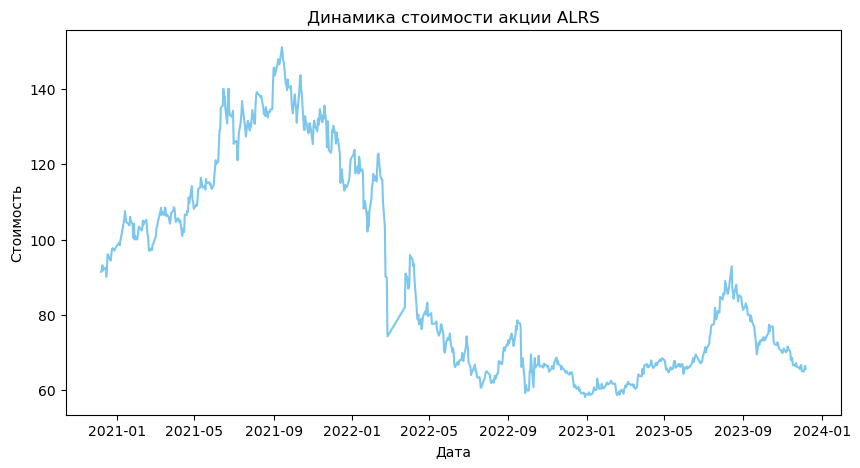

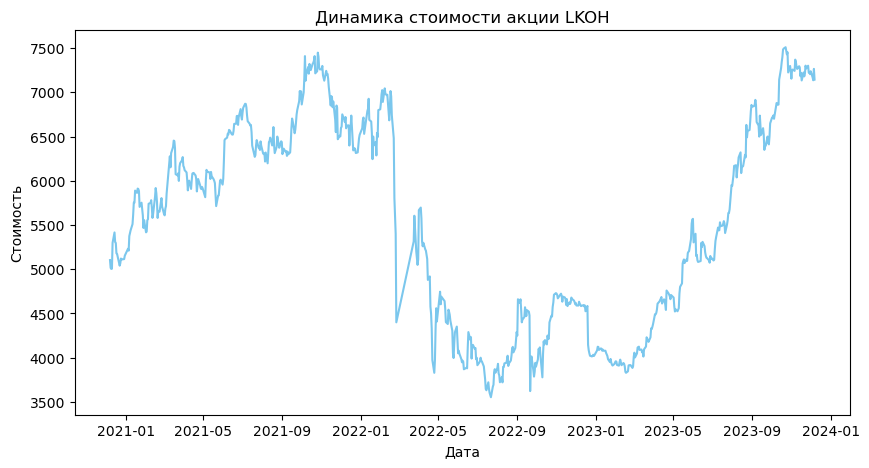

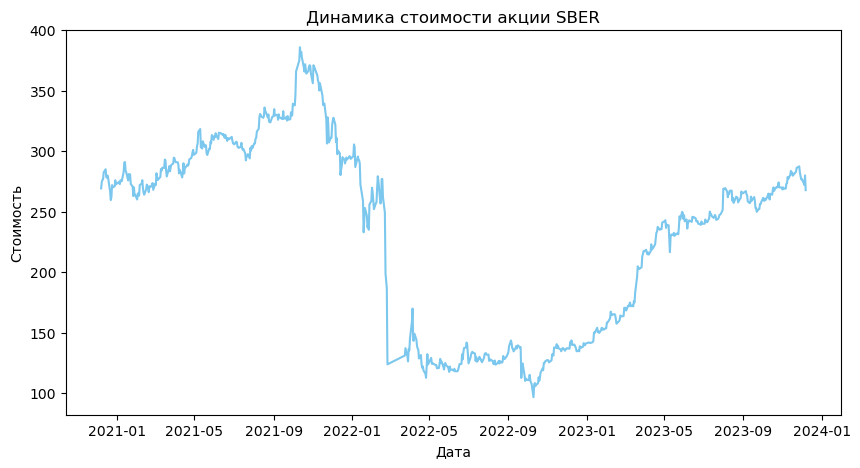

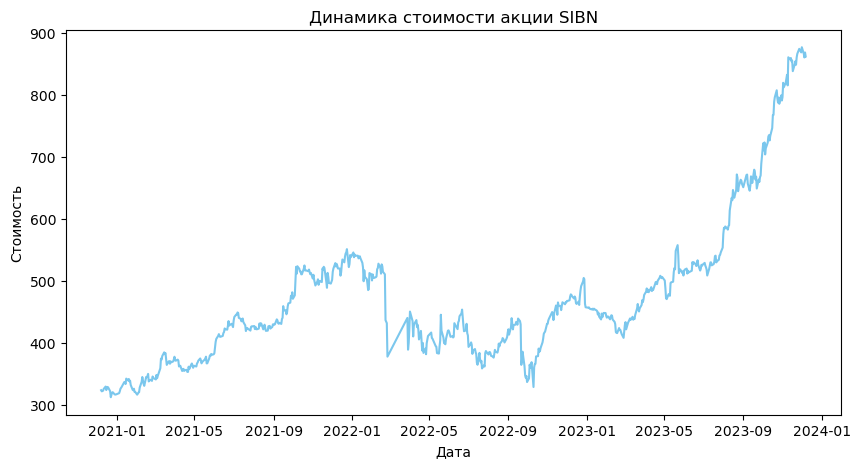

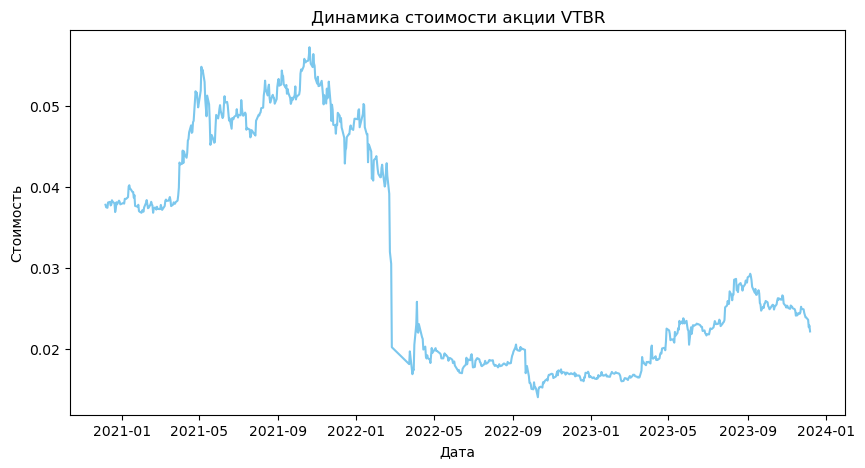

In [8]:
for i in df['tiker'].unique():
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df[df['tiker'] == i], x='date',y='open',color = "#7BC7ED").set(title=f'Динамика стоимости акции {i}', xlabel='Дата', ylabel = 'Стоимость')
    plt.show() #изображаем динамику цены открытия

ЦЕНА ЗАКРЫТИЯ

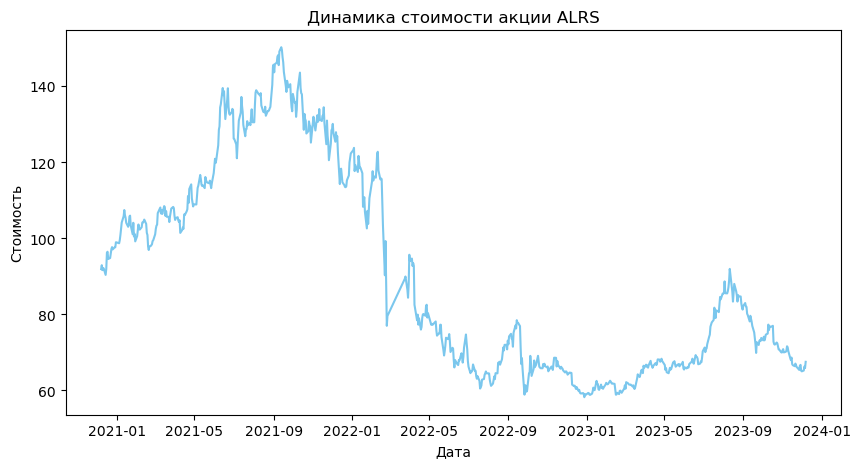

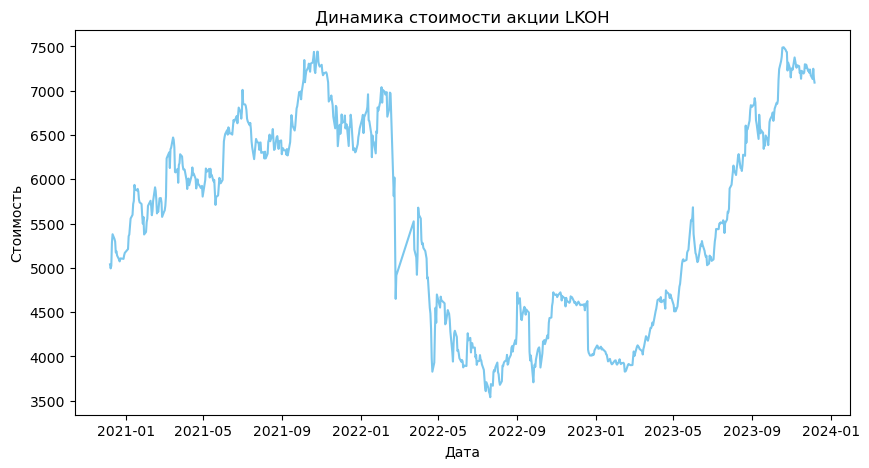

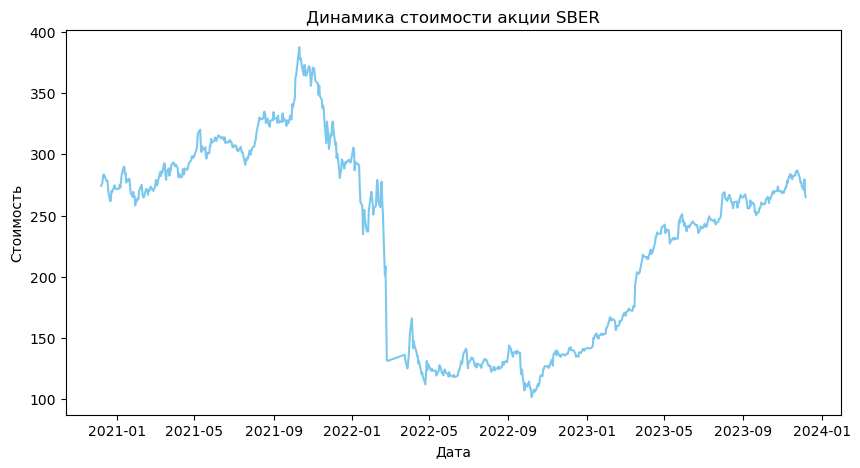

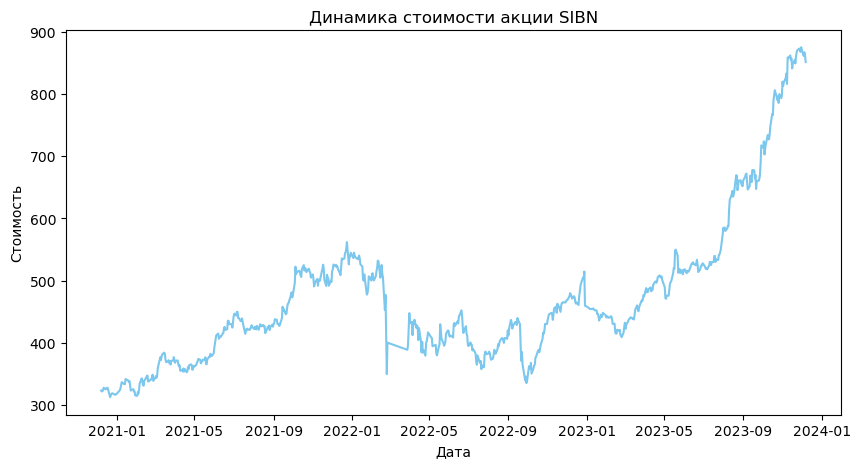

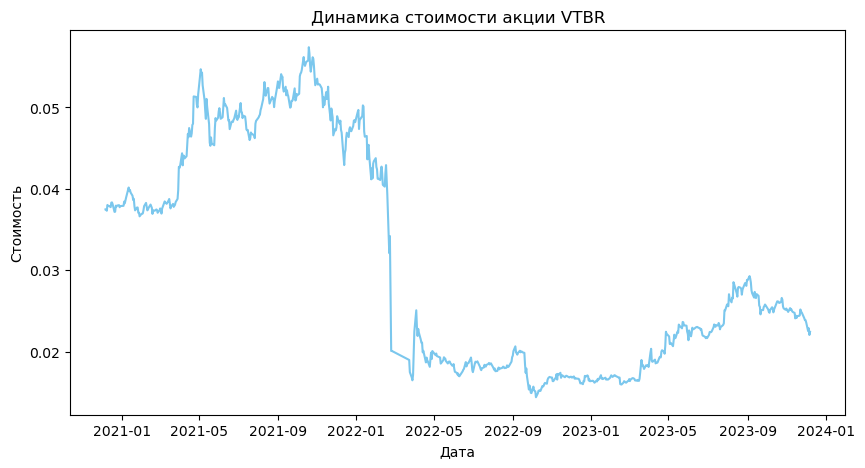

In [9]:
for i in df['tiker'].unique():
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df[df['tiker'] == i], x='date',y='close',color = "#7BC7ED").set(title=f'Динамика стоимости акции {i}', xlabel='Дата', ylabel = 'Стоимость')
    plt.show() #изображаем динамику цены закрытия

АЛРОСА:

   Как видно по графику, в начале исследуемого периода наблюдается рост цены закрытия акций. Пика достигает цена в сентябре 2021 года, затем цена начала постепенно снижаться - причина, возможная, выплата дивидендов. С начала 2022 г. акции АЛРОСА находятся в нисходящем тренде, давление оказывают внешний фон и геополитика. После старта торгов в марте снижение продолжилось из-за сильного рубля, а также санкционного давления.
   В 2023 году стоимость акций особо не менялась, в сентябре стоимость акций резко возрасла, опять же, скорее всего из-за сезона закрытия полугодовых диведендов. В целом, акции «Алросы» в конце 2023 года показали лучший результат в составе индекса МосБиржи. Это произошло на фоне новости, что лидеры индийской алмазной отрасли решили не продлевать добровольное эмбарго на импорт алмазного сырья — его срок истекает 15 декабря. Решение приняли из-за улучшения рыночной конъюнктуры.

ЛУКОЙЛ:

   Как видно по графику, цена закрытия акций в 2021 году постоянно то возрастала, то убывала. Был комфортный курс национальной валюты, отсутствовали ограничения и приятно высокие цены на нефть. 
    В начале 2022 года стоимость акций резко снизилась, возможная причина - Вагит Алекперов, совладелец, президент и основатель крупнейшей в России частной нефтяной компании "Лукойл", принял решение покинуть свой пост, а также выйти из совета директоров.
    В ходе торгов на Московской бирже 22 августа 2023 года акции подскочили почти на 6,5 процента, достигнув максимума с февраля 2022 года. Акции резко подорожали на новостях о планах компании выкупить до 25 процентов своего уставного капитала у нерезидентов, чьи вложенные средства сейчас заблокированы на счетах типа «С», а также аналитики «Открытие Инвестиции» считают, что на бумаги повлияли ожидания дивидендов. В мае совет директоров компании отложил решение о выплате дивидендов за 2021 год до конца этого года.
    По сути, акция начала свой рост только в мае 2023 года, и с того момента выросла на 65%, что довольно много и довольно быстро. В итоге она последние месяцы и удерживала индекс ММВБ от крупного падения. 
    Таким образом, на протяжении 2023 года стоимость акций компани растет - активная дивидендная политика, низкие мультипликаторы.
   
   СБЕРБАНК:
    
   Акции Сбербанка после начавшейся в октябре 2021 года волатильности потеряли больше трети своей стоимости.Стоимость акций Сбербанка упала в большей степени, потому что банки и технологические компании – любимчики инвесторов. По словам аналитика «Атона» Михаила Ганелина: они были в перевесе у международных инвесторов, более того, множество американских инвесторов держали акции Сбербанка (около 44% держателей акций – иностранные юридические лица). А санкционная риторика о возможных санкциях против банков и постоянное нагнетание геополитической обстановки приводит к тому, что инвесторы не хотят ждать изменений.
    В марте 2023 года акции фактически удвоились в цене после объявления о выплате рекордных дивидендов. В целом в 2023 году наблюдается рост - в конце 2023 года стоимость акций достигла пиковой цены 2022 года - минфин заложил в проект бюджета дивиденды Сбербанка от 50% прибыли, рекордные показатели прибыли за 2023 год, обновление дивидендной политики.
    
   ГАЗПРОМ:
    
   Акции Газпром нефти были распроданы в начале 2022 г. на фоне геополитических рисков после сильного роста в 2021 г. С марта по октябрь 2022 г. они находились в широкой консолидации, покинуть которую удалось лишь в ноябре. В конце 2022 г. компания выплатила дивиденды, акции вновь перешли к снижению. 
    Акции с августа 2023 выросли почти на 60%, это явный лидер в нефтегазовом секторе. Одна из основных причин роста — это рекомендация неожиданно высоких дивидендов по итогам 9 мес. 2023 года.
    Рынок нефти впринцепи имел хорошие показатели так что можно сделать вывод что тренд восходящий, актив был не особо волатильный, но перспективный.
    
   ВТБ: 
    
   У ВТБ все относительно стабильно. Компания сильнее других финансовых организаций пострадала в 2022 году от геополитического кризиса. Основная причина – это то, что компания занимала лидирующие позиции в обслуживании внешнеторгового бизнеса. В 2022 г. были введены санкции со стороны США, ЕС, Великобритании, Канады, Австралии. Банк отключили от системы SWIFT. Были заморожены активы ВТБ в Великобритании, Японии и Сингапуре. Также из-за санкций были выведены из периметра группы «ВТБ капитал» и «ВТБ Европа». В итоге, ВТБ в 2022 показал рекордный убыток 612,6 млрд ₽.За год с минимумов акции ВТБ выросли на 80%. Рост с начала 2023 года превышает 50%. Но с начала сентября котировки снизились с локальных максимумов на 10%.
    
   По итогам 2021 года была зафиксирована рекордная прибыль. Сам банк прогнозировал двузначную дивидендную доходность. Но вмешались внешние обстоятельства в виде санкций и других ограничений, ВТБ вынужденно отказался от дивидендов.

По итогам 2022 был показан рекордный убыток. Вся нераспределенная прибыль за предыдущие годы была списана. Естественно, о дивидендах речь не шла.

По итогам 2023 года, несмотря на хорошую текущую прибыль, ВТБ планирует снова отказаться от дивидендов. Вся прибыль пойдет на восстановление капитала. Но если бы банк мог отправить на дивиденды 50% ЧП, то они бы превысили 15%.

   ОБЩИЙ ТРЕНД: Начало 2022 года стало очень беспокойным временем для участников торгов на российском фондовом рынке. Почти сразу после завершения новогодних каникул на нем начались агрессивные распродажи - падение российского фондового рынка.

#### ГРАФИК "СВЕЧИ"

Свечной график отображает целый ряд значений информации по цене, таких как цена открытия, цена закрытия, максимальная и минимальная цена, и использует для этого графические символы в форме свечей, каждая из которых дает краткий обзор результатов торговой деятельности за определенный период времени.

Основной прямоугольник графического элемента называется телом. Оно отображает диапазон между ценой открытия и ценой закрытия в определенный период времени. Линии, исходящие из верхней и нижней части тела, называются нижней и верхней тенью. Каждая тень представляет собой максимальную или минимальную цену торгов за указанный период времени. Если рынок бычий (цена закрытия выше цены открытия), то тело, как правило, окрашено в белый или зеленый цвет. А если рынок медвежий (цена закрытия ниже цены открытия), то тело обычно имеет черный или красный цвет.


In [10]:

import plotly.graph_objects as go
for i in df['tiker'].unique():
    plt.figure(figsize=(10, 5))
    fig = go.Figure(data=[go.Candlestick(x=df[df['tiker'] == i]['date'],
                open=df[df['tiker'] == i]['open'],
                high=df[df['tiker'] == i]['high'],
                low=df[df['tiker'] == i]['low'],
                close=df[df['tiker'] == i]['close'])])
    fig.update_layout(
    title=f'Динамика стоимости акции {i}',
    yaxis_title='Стоимость',
    xaxis_title='Дата')
    fig.show()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

### 5. Для каждой акции поиск дней максимального изменения цены (взлета и падения). Отчет.

In [11]:
df['diff'] = df['close'] - df['open']  #считаем изменение цены

C:\Users\Админ\AppData\Local\Temp\ipykernel_15056\1936351532.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
df_new = pd.DataFrame({'tiker':[],'date_max':[],'max':[],'date_min':[],'min':[]})

In [13]:
#составляем таблицу, в которой содержится информация о днях взлета и падения цен
for i in df['tiker'].unique():
    max_n2 = df[df['tiker'] == i]['diff'].max()
    min_n2 = df[df['tiker'] == i]['diff'].min()
    date_max = df[(df['tiker'] == i)&(df['diff'] == max_n2)]['date'].mean()
    date_min = df[(df['tiker'] == i)&(df['diff'] == min_n2)]['date'].mean()
    df_new.loc[len(df_new.index)] = [i, date_max, max_n2, date_min, min_n2]
df_new 

tiker   date_max       max   date_min        min
0  ALRS 2022-02-22    9.2000 2022-02-24  -12.96000
1  LKOH 2022-03-31  568.0000 2022-02-24 -750.00000
2  SBER 2021-11-23   20.5600 2022-02-24  -54.40000
3  SIBN 2023-11-09   42.7500 2022-02-24  -82.10000
4  VTBR 2021-04-23    0.0032 2022-02-24   -0.01041

Как видно, максимальные изменения цен - убытки у всех акций 24 февраля 2022 года - обвал рынка. Дни максимального роста отличаются.
У Сбербанка 22 февраля 2022 года, у Лукойла 31 марта 2022 года  и так далее.

### 6. Скользящие средние (периоды 10, 50, 100) для каждой акции.

10-ти дневная скользящая средняя

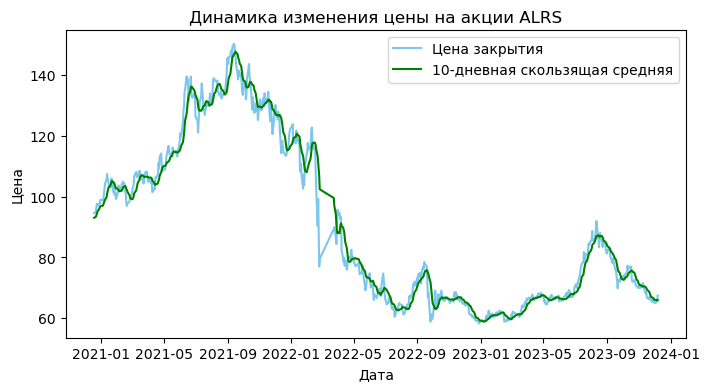

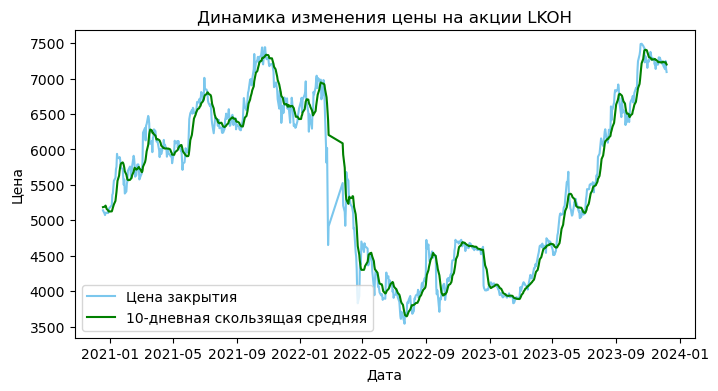

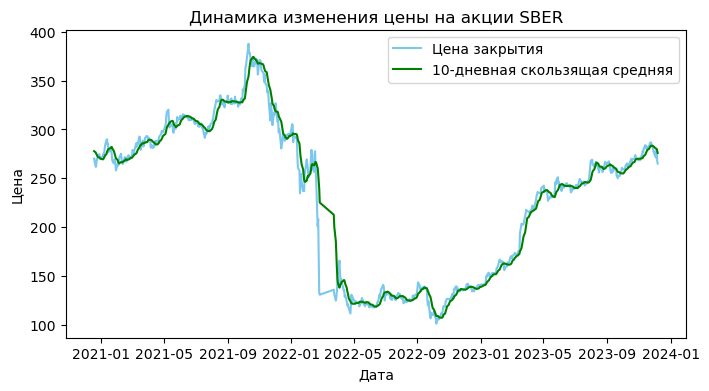

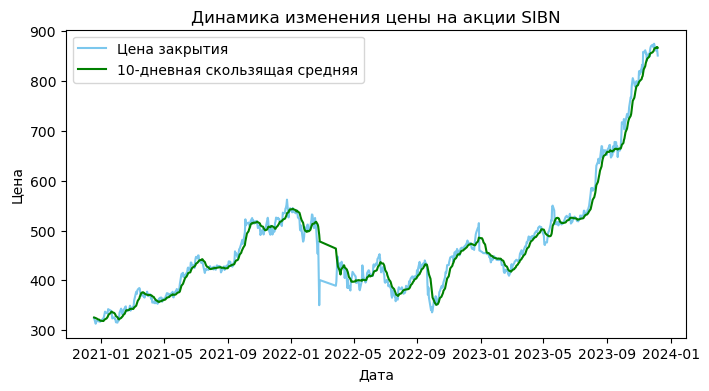

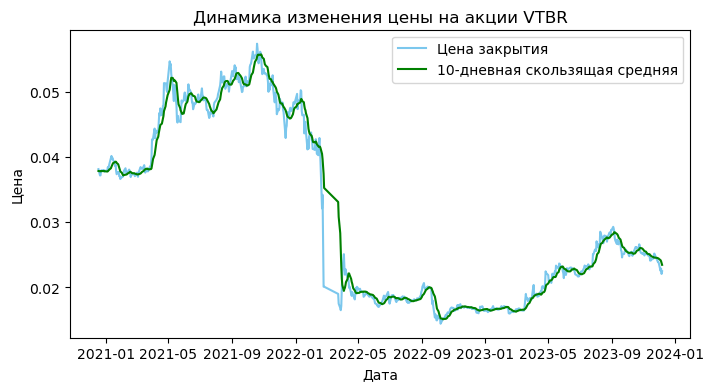

In [14]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new["moving_average"] = df_new["close"].rolling(window=10).mean()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(8, 4)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED", label="Цена закрытия")
    b = sns.lineplot(data=df_new, x='date',y='moving_average',color = "green", label="10-дневная скользящая средняя")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a, b)

Практически совпадает с фактической динамикой стоимости.Чем короче период, тем более чувствительна скользящая средняя к изменению цены, и наоборот.


50-ти дневная скользящая средняя

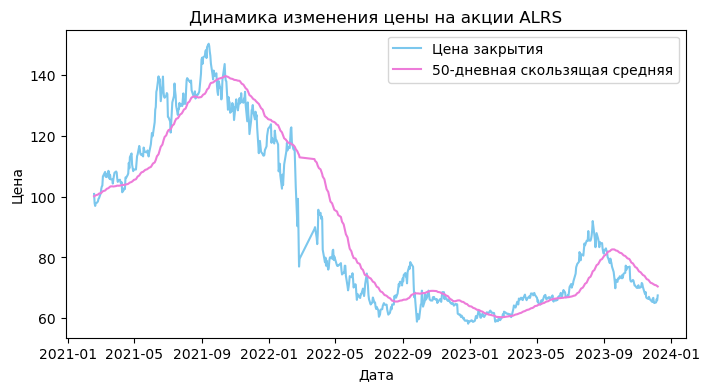

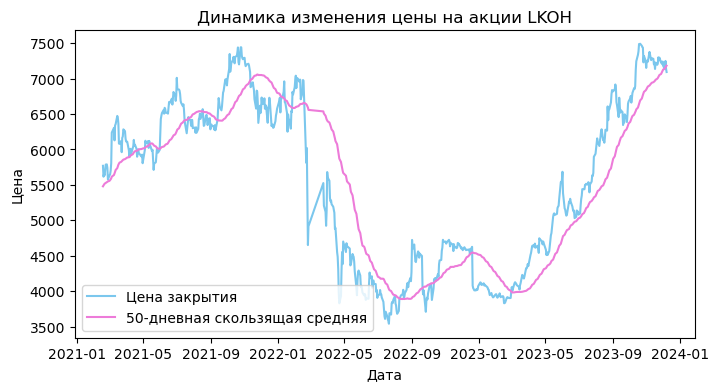

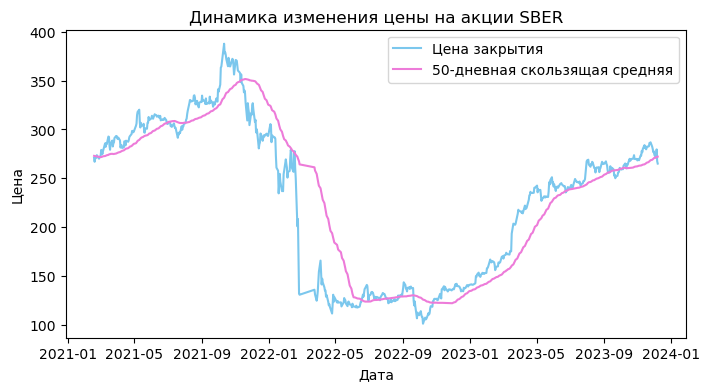

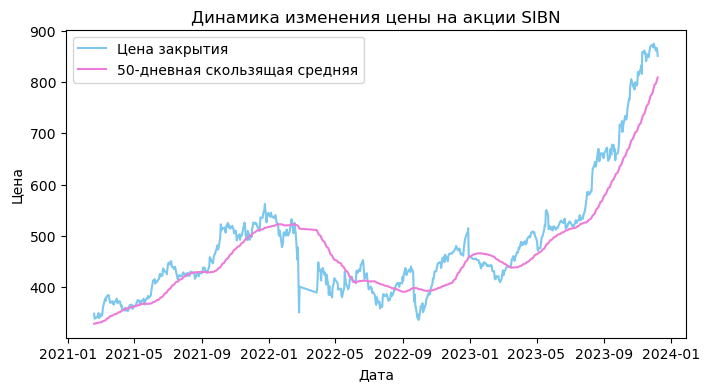

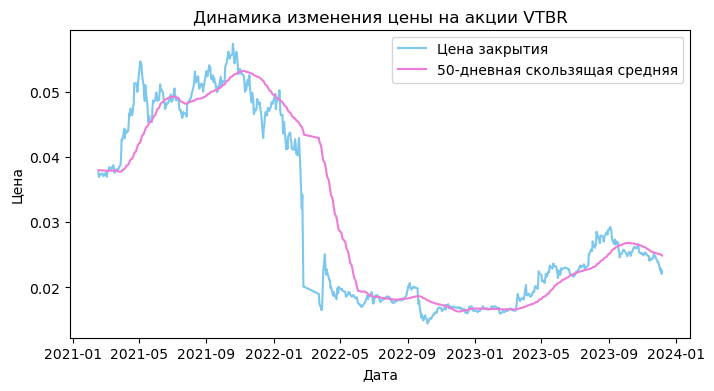

In [15]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new["moving_average"] = df_new["close"].rolling(window=50).mean()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(8, 4)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
    b = sns.lineplot(data=df_new, x='date',y='moving_average',color = "#ED7BD9",label="50-дневная скользящая средняя")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a, b)

Скользящая средняя показывает тенденцию, преобладающую на рынке. Когда цена находится выше средней, текущая ситуация лучше ожиданий, а значит — на рынке преобладают «бычьи» настроения (больше покупателей). Если же цена опускается ниже линии индикатора — значит, ожидания не оправдались, и на рынке господствуют «медведи» (продавцы).

Таким образом, пересечение скользящей средней с ценой может стать сигналом для совершения сделки: пересечение цены снизу вверх дает сигнал на покупку, сверху вниз — на продажу. Кроме этого, линия индикатора выступает в качестве уровней поддержки и сопротивления.


100-ти дневная скользящая средняя

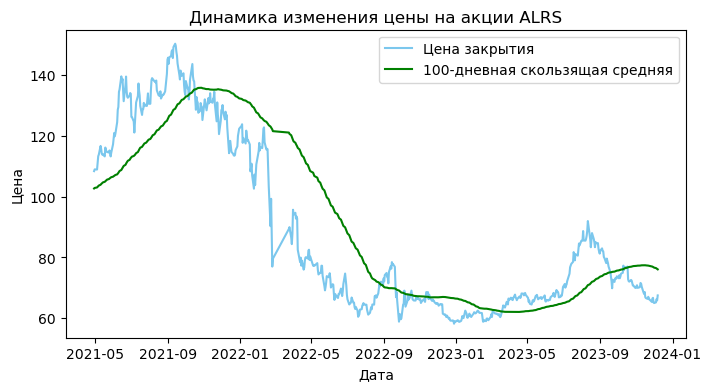

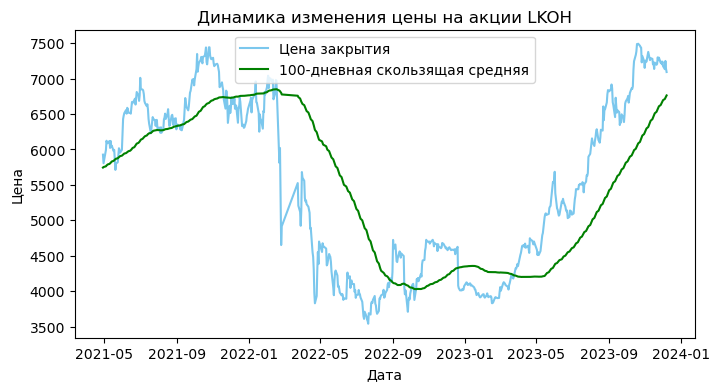

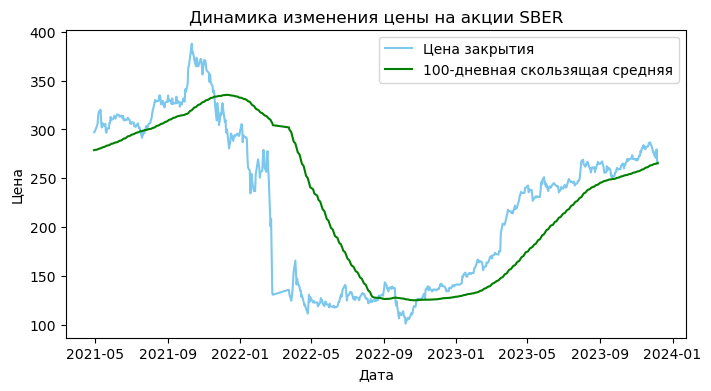

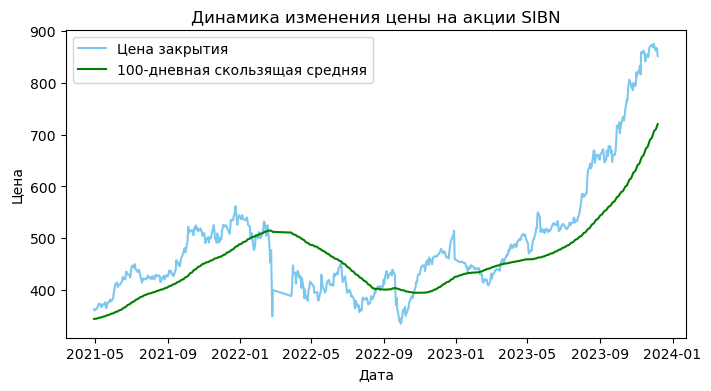

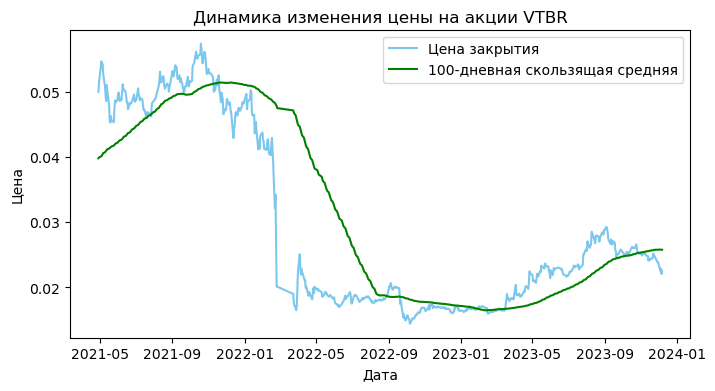

In [16]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new["moving_average"] = df_new["close"].rolling(window=100).mean()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(8, 4)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
    b = sns.lineplot(data=df_new, x='date',y='moving_average',color = "green",label="100-дневная скользящая средняя")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a, b)

100-дневная скользящая средняя как-будто лучше показывает тенденцию. Так видно, что на примере акций АЛРОСА, там, где фактическая стоимость выше скользящей средней - наблюдается рост, пересечение цены снизу вверх дает сигнал на покупку, а там где стоимость ниже, сверху вниз — на продажу.


#### Также можно посмотреть пересечение скользящих средних.  Это будет далее.

ДРУГОЙ СПОСОБ

In [17]:
#10-ти дневная скользящая средняя
list_sr_10= []

for i in df['tiker'].unique():
    x = df[df['tiker'] == i]['open'].tolist()
    def moving_avg(x, n):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[n:] - cumsum[:-n]) / float(n)
    n = 10
    list_sr_10.append(moving_avg(x, n))

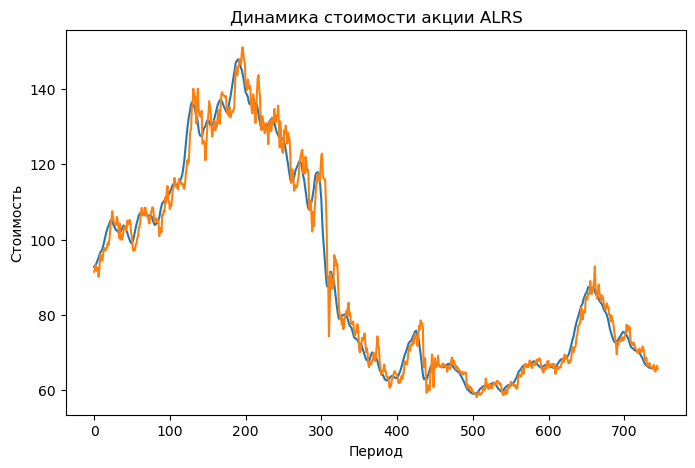

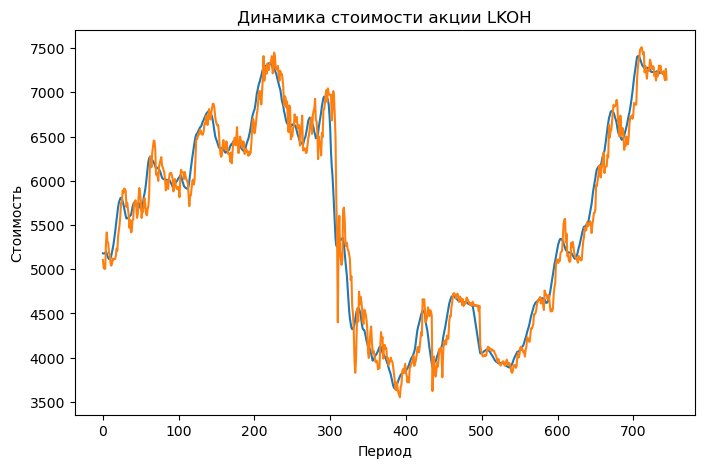

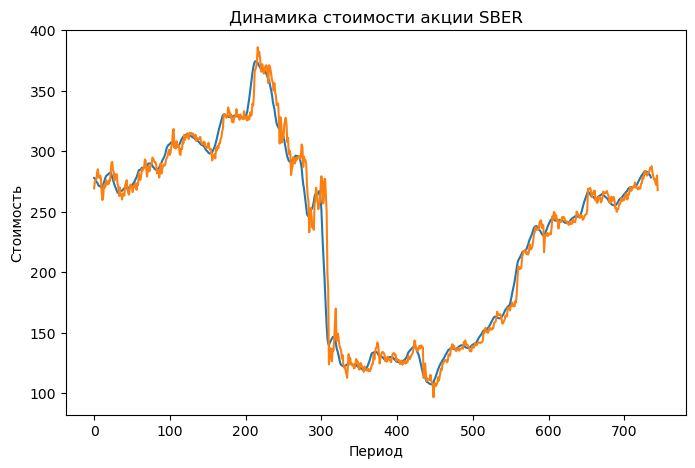

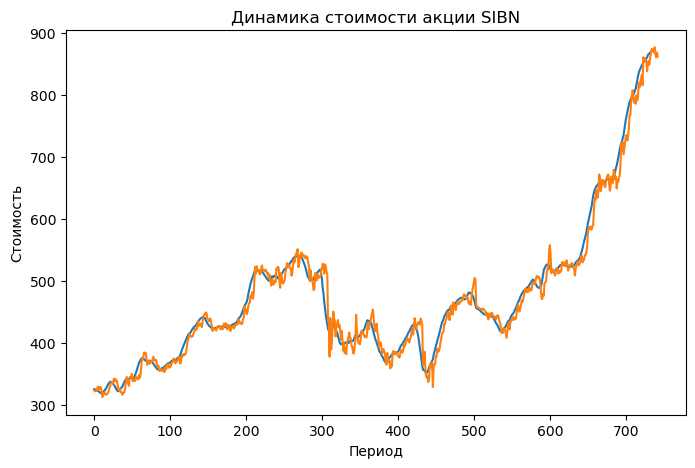

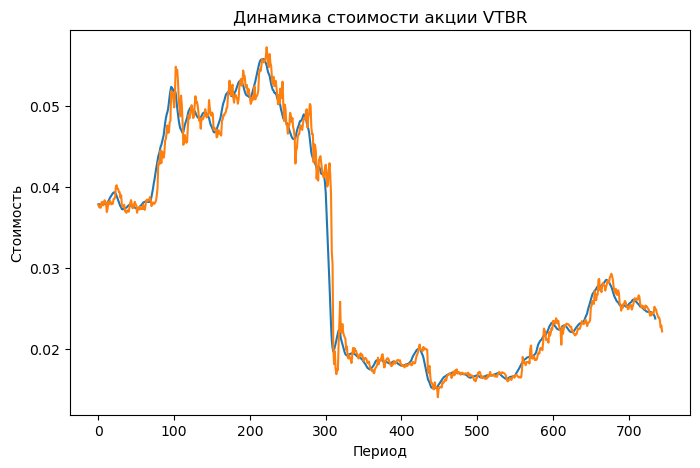

In [18]:
for i in range(len(df['tiker'].unique())):
    plt.figure(figsize=(8, 5))
    plt.plot(list_sr_10[i])
    plt.plot(df[df['tiker'] == (df['tiker'].unique()[i])]['open'].tolist())
    plt.title (f"Динамика стоимости акции {df['tiker'].unique()[i]}")
    plt.xlabel('Период')
    plt.ylabel('Стоимость')

In [19]:
#50-ти дневная скользящая средняя
list_sr_50= []

for i in df['tiker'].unique():
    x = df[df['tiker'] == i]['open'].tolist()
    def moving_avg(x, n):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[n:] - cumsum[:-n]) / float(n)
    n = 50
    list_sr_50.append(moving_avg(x, n))

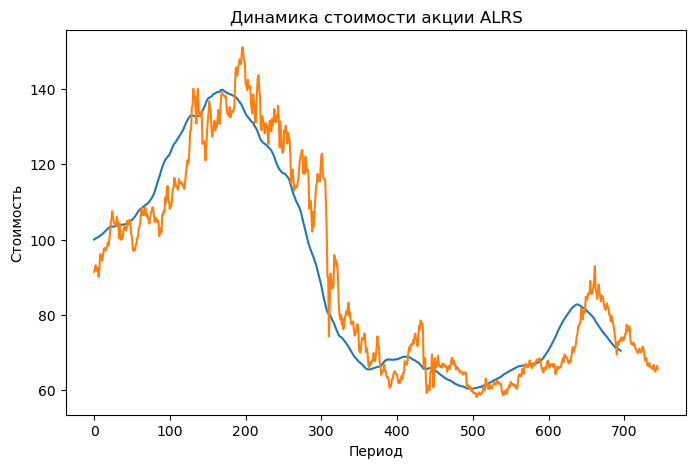

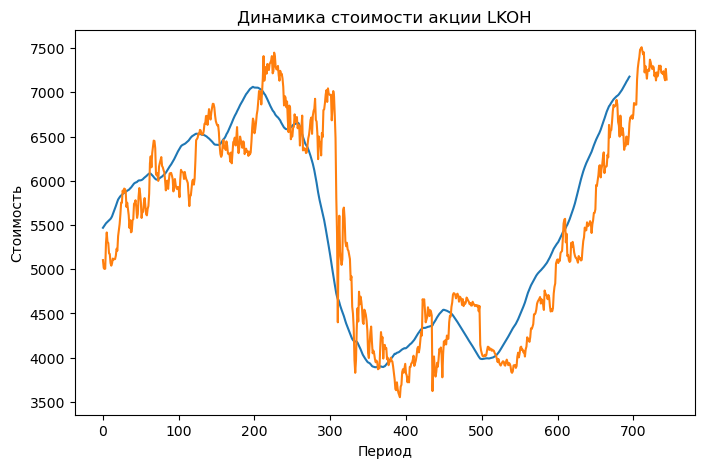

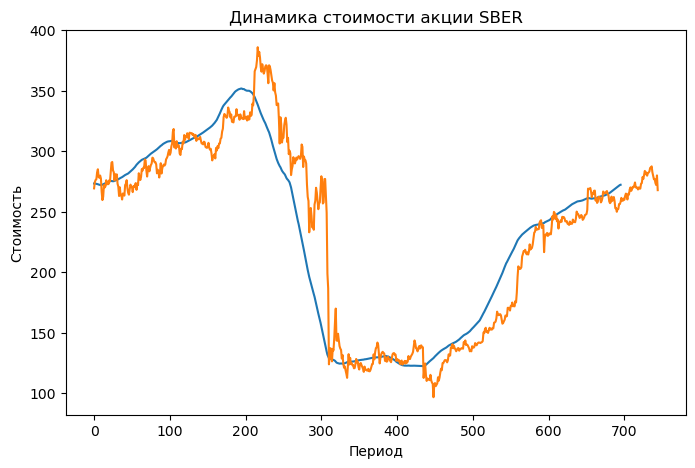

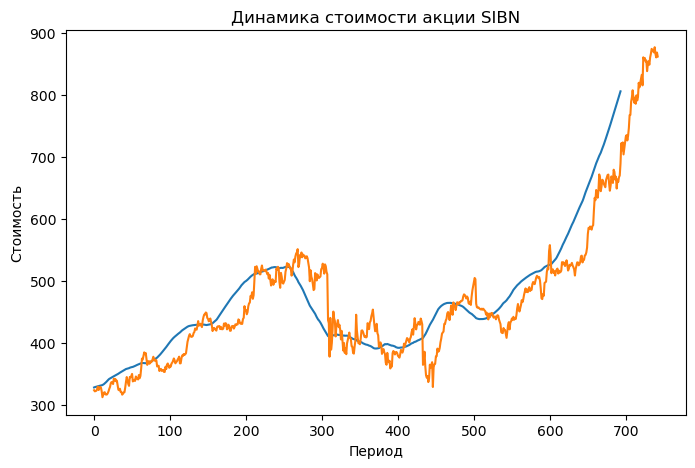

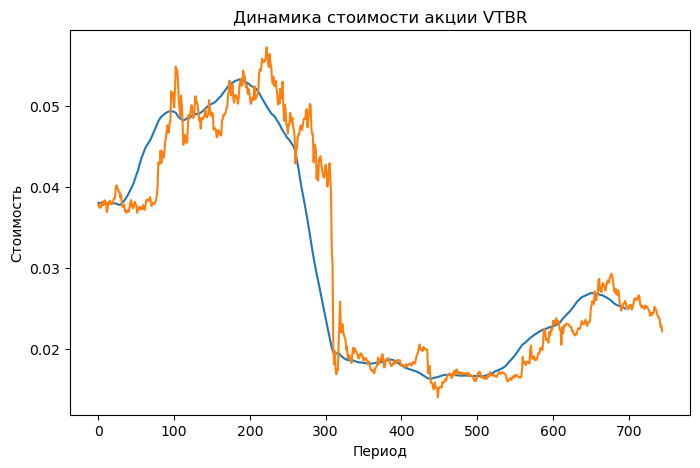

In [20]:
for i in range(len(df['tiker'].unique())):
    plt.figure(figsize=(8, 5))
    plt.plot(list_sr_50[i])
    plt.plot(df[df['tiker'] == (df['tiker'].unique()[i])]['open'].tolist())
    plt.title (f"Динамика стоимости акции {df['tiker'].unique()[i]}")
    plt.xlabel('Период')
    plt.ylabel('Стоимость')

In [21]:
#100- дневная скользящая средняя
list_sr_100 = []

for i in df['tiker'].unique():
    x = df[df['tiker'] == i]['open'].tolist()
    def moving_avg(x, n):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[n:] - cumsum[:-n]) / float(n)
    n = 100
    list_sr_100.append(moving_avg(x, n))


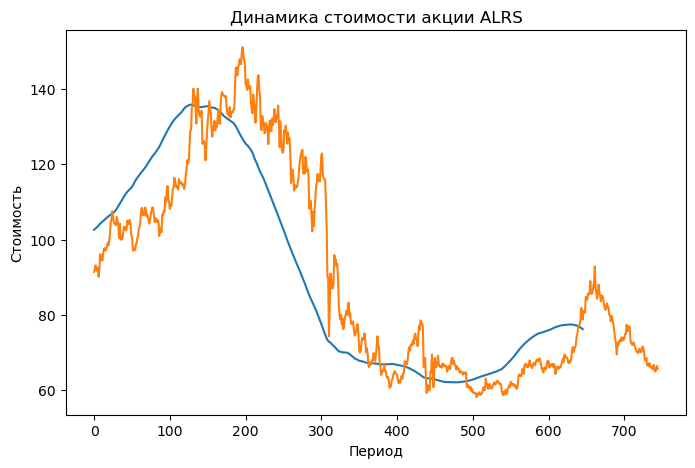

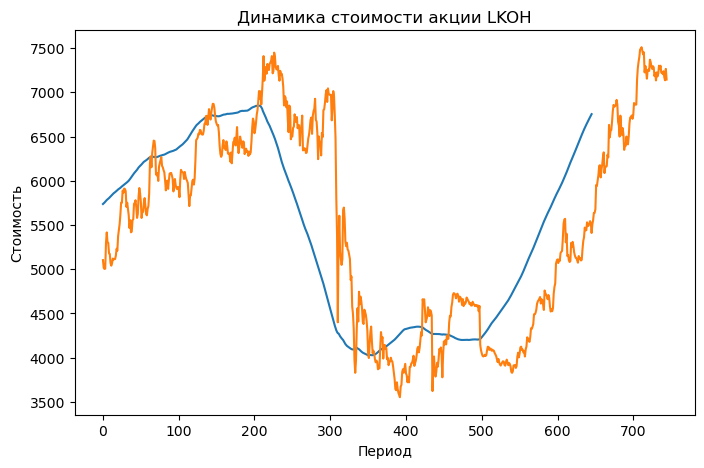

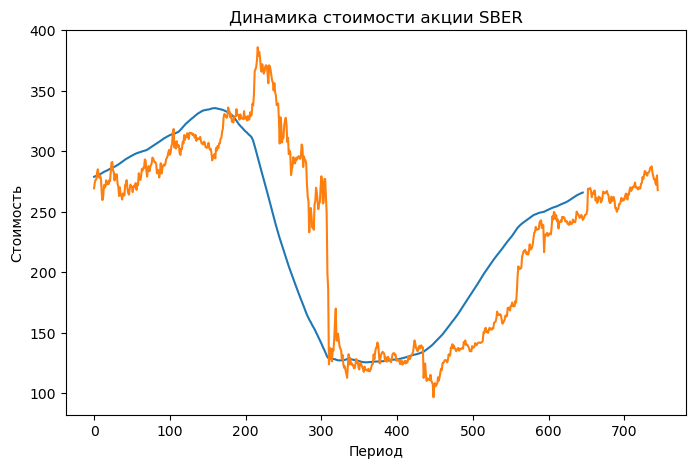

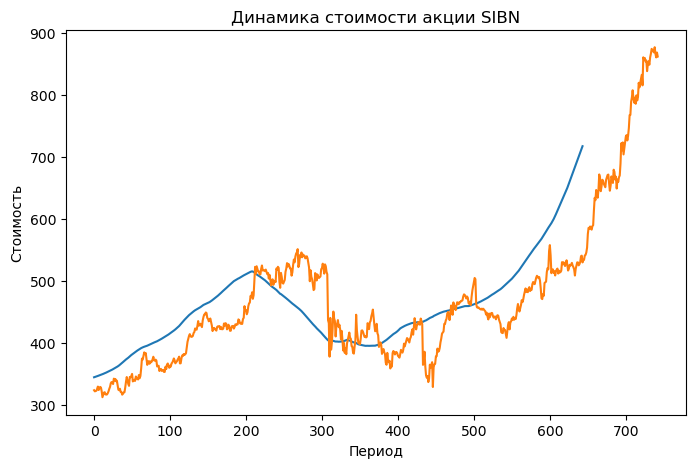

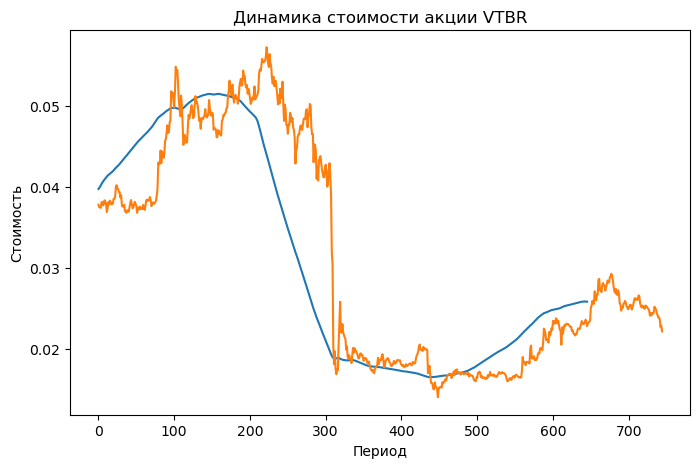

In [22]:
for i in range(len(df['tiker'].unique())):
    plt.figure(figsize=(8, 5))
    plt.plot(list_sr_100[i])
    plt.plot(df[df['tiker'] == (df['tiker'].unique()[i])]['open'].tolist())
    plt.title (f"Динамика стоимости акции {df['tiker'].unique()[i]}")
    plt.xlabel('Период')
    plt.ylabel('Стоимость')

### 7. Графики объема (volume) для каждого тикера.

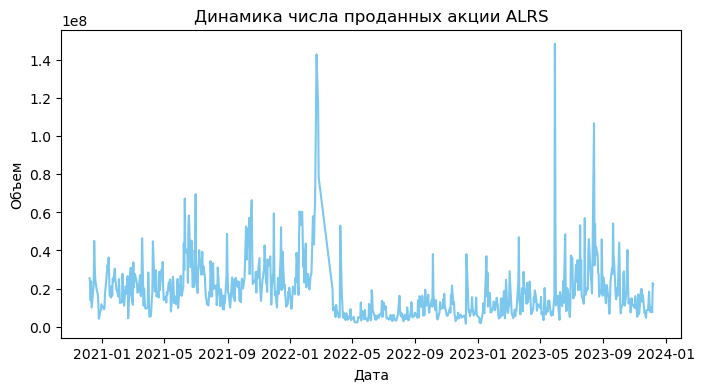

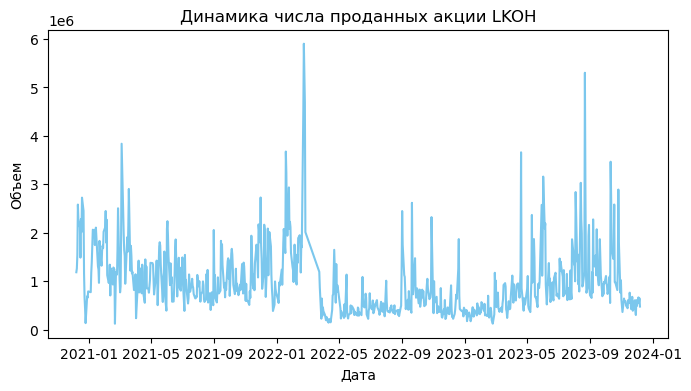

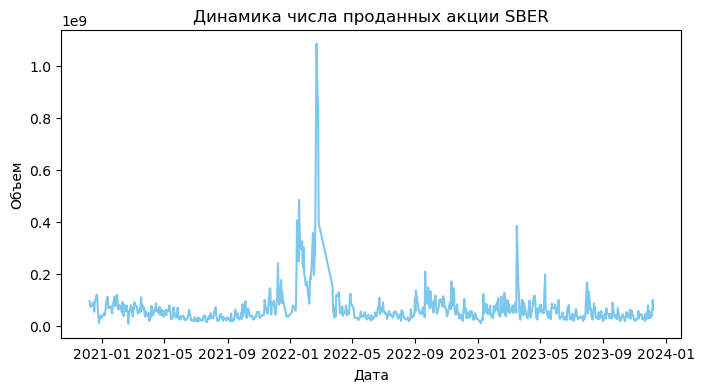

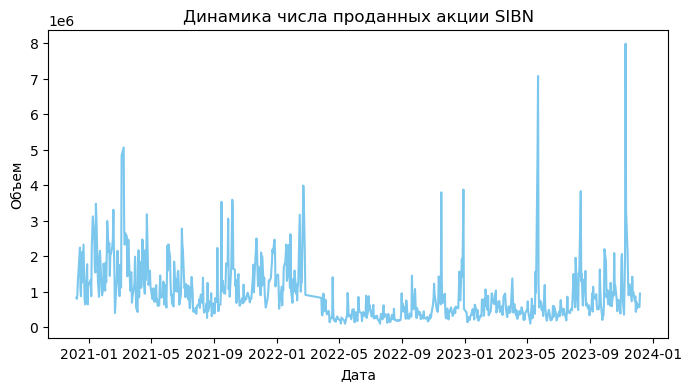

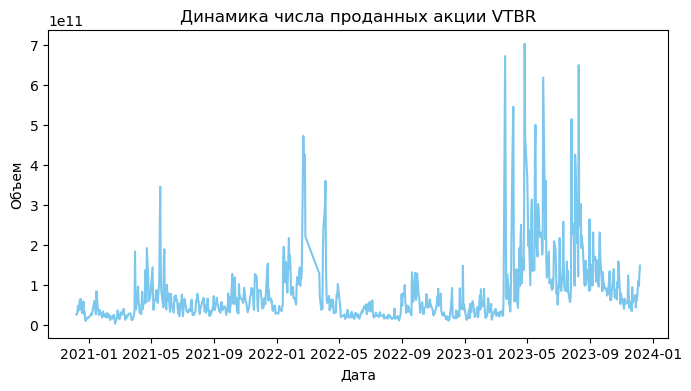

In [23]:
for i in df['tiker'].unique():
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df[df['tiker'] == i], x='date',y='volume',color = "#7BC7ED").set(title=f'Динамика числа проданных акции {i}', xlabel='Дата', ylabel = 'Объем')
    plt.show()

Динамика объема проданных акций сильно варьируется. Если инвесторы приобрели большое количество ценных бумаг компании — их стоимость вырастет. Если продали — их стоимость снизится. Так, по графику можно примерно определить наиболее активные в плане осуществления операций периоды.

АЛРОСА: 

   Февраль 2022 года - резкий скачок, что очевидно. Аналогичный скачок в мае 2023.
    
ЛУКОЙЛ:

   Февраль 2022 года - резкий скачок, также на протяжении всего периода таких скачков было много.
     
СБЕРБАНК:

   Февраль 2022 года - резкий скачок, а в целом динамика +- стабильна.

ГАЗПРОМ:

   Февраль 2022 года - резкий скачок, также на протяжении всего периода таких скачков было много.

ВТБ:
   Февраль 2022 года - резкий скачок. В 2023 году много скачков, хотя динамика стоимости акций +- стабильная. Такие сильные колебания из-за того, стоимость акций очень низкая и операций по ним, соответсвенно, гораздо больше.


### 8. График цены вместе с скользящими средними с периодом 50, 100 и график объема. 

In [24]:
df['year'] = df['date'].dt.year

C:\Users\Админ\AppData\Local\Temp\ipykernel_15056\343203772.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



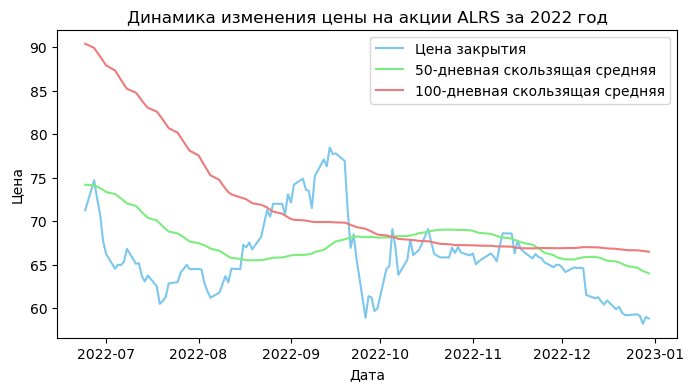

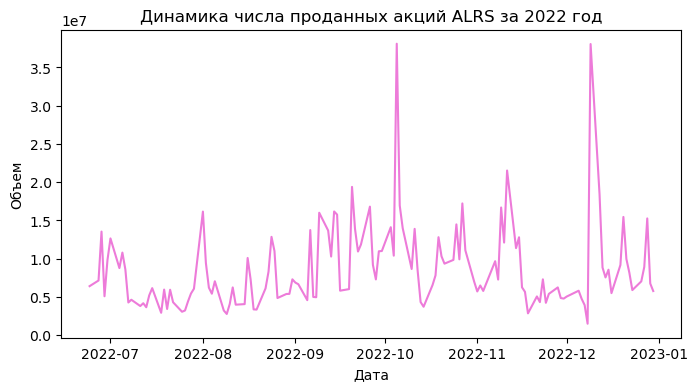

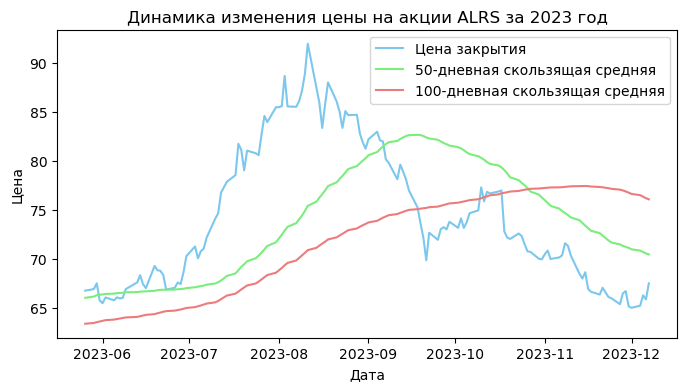

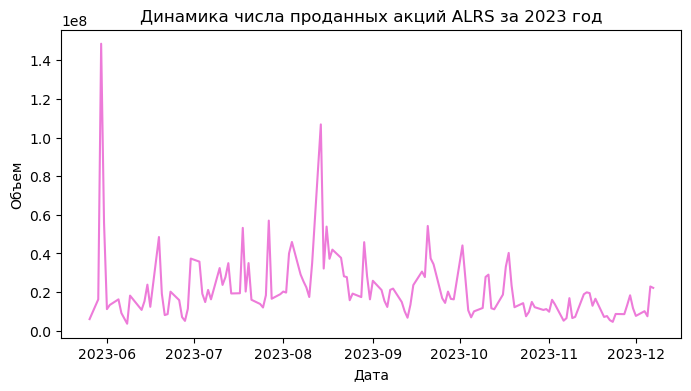

In [25]:
def newfunc(tiker_year):
    for i in range(len(tiker_year)):
        df_new_1 = pd.DataFrame({'close': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['close'].tolist(), 'date': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['date'].astype(str).tolist(),'volume': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['volume'].tolist()}) 
        df_new_1['date'] = pd.to_datetime(df_new_1['date'])
        df_new_1["moving_average_50"] = df_new_1['close'].rolling(window=50).mean()
        df_new_1["moving_average_100"] = df_new_1['close'].rolling(window=100).mean()
        df_new_1 = df_new_1.dropna()
        plt.figure(figsize=(8, 4)) 
        a = sns.lineplot(data=df_new_1, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
        b = sns.lineplot(data=df_new_1, x='date',y='moving_average_50',color = "#7BED7D",label="50-дневная скользящая средняя")
        d = sns.lineplot(data=df_new_1, x='date',y='moving_average_100',color = "#ED7B7B",label="100-дневная скользящая средняя")
        plt.title(f"Динамика изменения цены на акции {tiker_year[i][0]} за {tiker_year[i][1]} год") 
        plt.xlabel("Дата")
        plt.ylabel("Цена")
        plt.show()
        plt.figure(figsize=(8, 4)) 
        c = sns.lineplot(data=df_new_1, x='date',y='volume',color = "#ED7BD9")
        plt.title(f"Динамика числа проданных акций {tiker_year[i][0]} за {tiker_year[i][1]} год") 
        plt.xlabel("Дата")
        plt.ylabel("Объем")
        plt.show()
    
newfunc([('ALRS',2022),('ALRS',2023)])

Ещё одна стратегия заключается в использовании на графике двух скользящих средних: одной длинной и одной короткой.

Так, на графике представлены пересечения 50-ти и 100 дневных скользящих средних. 

Когда краткосрочная линия пересекает долгосрочную и оказывается сверху, это является сигналом на покупку, так как указывает на смещение тренда вверх. Этот паттерн называется "золотой крест".

Между тем, когда краткосрочная линия пересекает долгосрочную и оказывается снизу, это является сигналом на продажу, так как указывает на смещение тренда вниз. Этот паттерн известен как "мёртвый крест".

Рассмотрим это на динамике акции АЛРОСА.

Так в 2022 году мы видим и первый, и второй случаи. И, собственно, примерно в период пересечения двух скользаящих средних объем акций резко возрастает. 

В 2023 году, такое пересечение одно, и оно сигнализирует о необходимости продажи акций. Собственно, их стоимость падает, однако, на графике объема особых всплесков нет.

### 9. Экспоненциальные скользящие средние для каждого тикера с периодом 50.

Экспоненциальная скользящая средняя, или EMA — это линия на ценовом графике, основанная на математической формуле для сглаживания ценового движения. Придавая больший вес недавней цене и меньший вес старым ценам, EMA быстрее адаптируется к последним изменениям на рынке, чем SMA, для которой все цены имеют одинаковый вес.

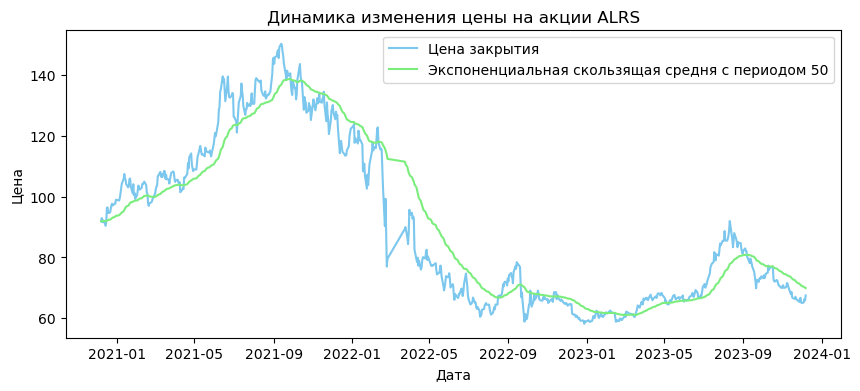

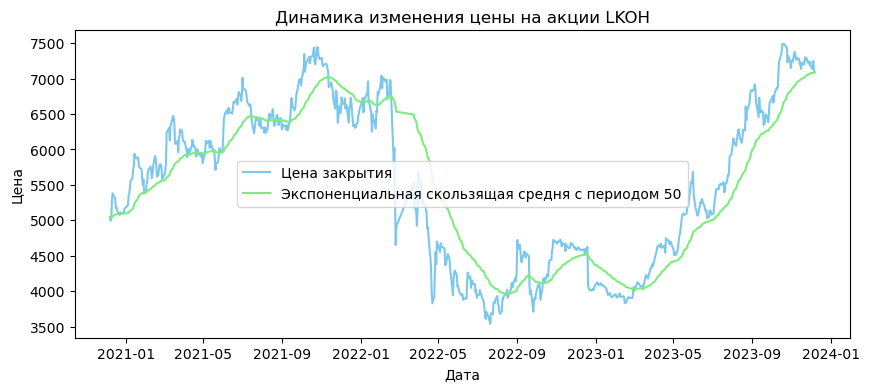

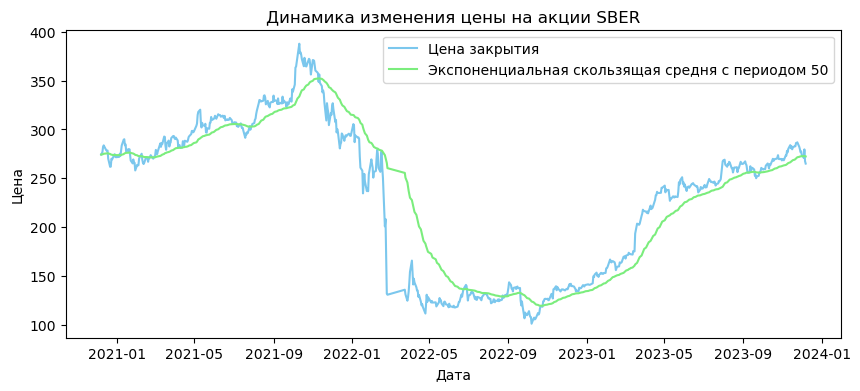

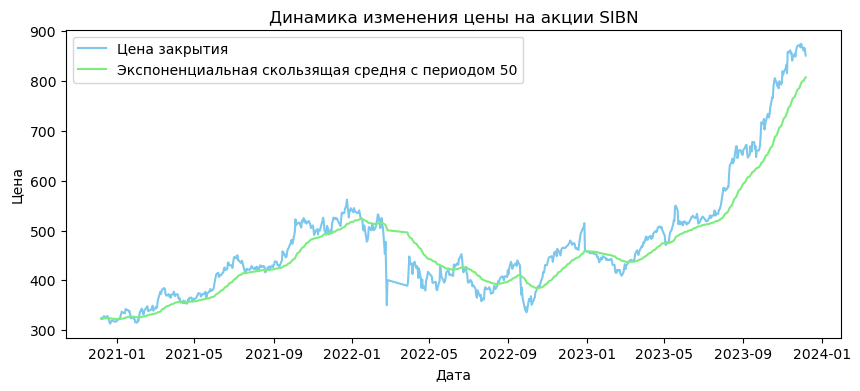

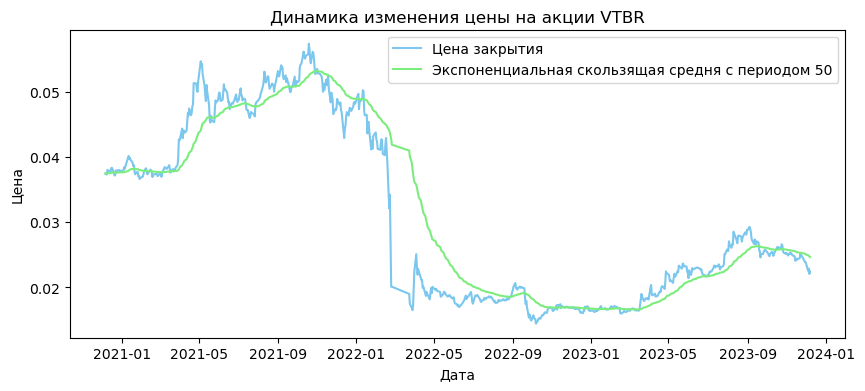

In [26]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new['moving_average_50_exp'] = df_new['close'].ewm(span= 50 , adjust= False ).mean()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(10, 4)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
    b = sns.lineplot(data=df_new, x='date',y='moving_average_50_exp',color = "#7BED7D",label="Экспоненциальная скользящая средня с периодом 50")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a, b)

50-дневные ЕМА в основном используются в качестве индикаторов для долгосрочных трендов.

Собственно, логика такая же, когда цена выше линии - сигнал к покупке, когда ниже - сигнал к продаже. Чаще всего там, где стоимость ниже линии - наблюдается снижение цены.

Также можно сделать вывод, что в 2021 году наблюдался тренд к повышению стоимости акций у большинства компаний, в 2022 году - спад, а в 2023 - у одних быстрый подъем, у других +- плавное восстановление.

Также прямая показывает, когда актив находится на пике (сопротивление), то есть когда нужно продавать, так и когда покупать, то есть когда цена падает (поддержка). 

Так в начале 2022 года по всем акциям очевидно сопротивление. Также можно проследить рыночные циклы (спад, депрессия, оживление, подъем).


### 10. Расчет индикатора RSI.

RSI (Relative strength index, индекс относительной силы) — это индикатор технического анализа, показывающий соотношение положительных и отрицательных изменений цены финансового инструмента.



In [27]:
def rsi(df, periods):
        close_delta = df['close'].diff()
        # Делаем две серий: одну для низких закрытий и одну для высоких закрытий
        up = close_delta.clip(lower=0)
        down = -1 * close_delta.clip(upper=0)
# Использование экспоненциальной скользящей средней
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        rsi = ma_up / ma_down
        rsi = 100 - (100/(1 + rsi))
        return rsi

Благодаря экспоненциальному методу усреднения и формуле расчета индикатора ценовые движения как бы проецируются на график со шкалой от 0 до 100, наглядно показывая истинную ценность каждого ценового изменения.


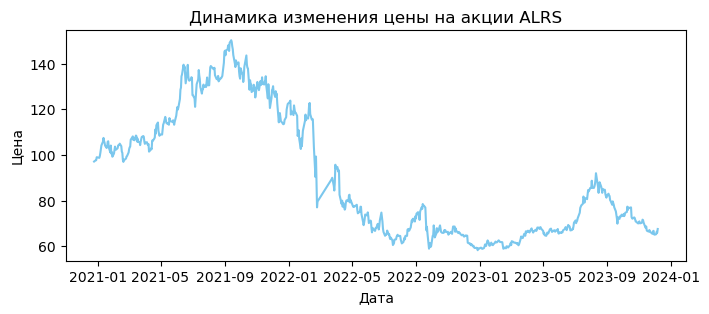

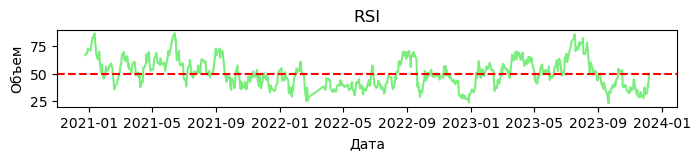

------------------------------------------------------------------------------------------------------------------


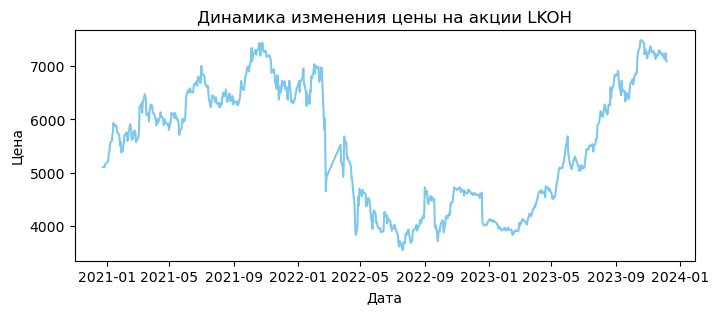

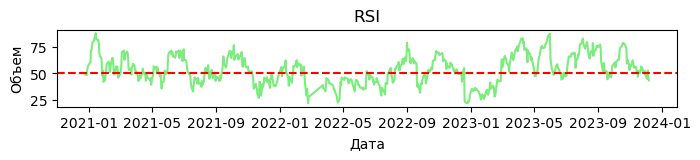

------------------------------------------------------------------------------------------------------------------


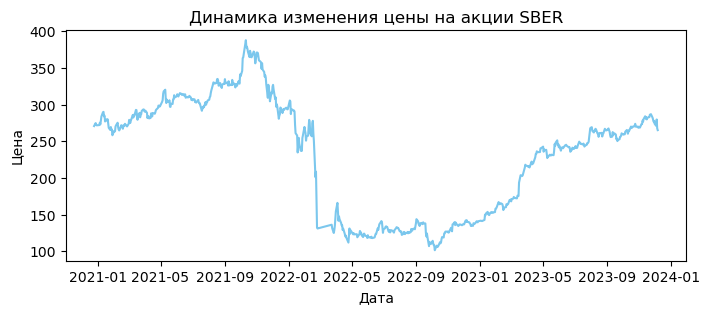

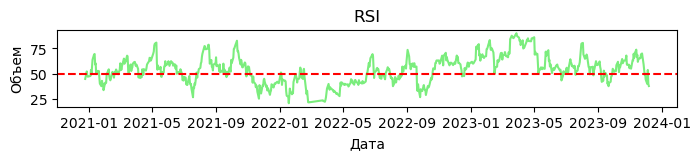

------------------------------------------------------------------------------------------------------------------


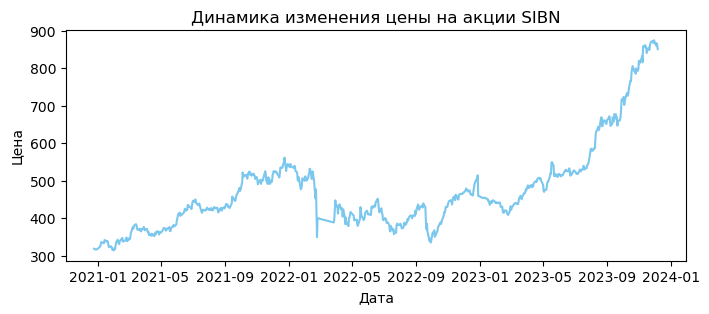

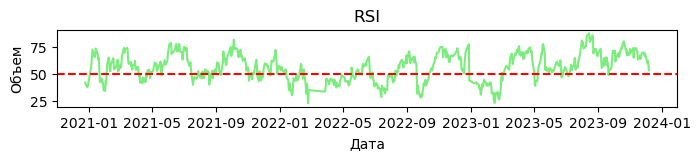

------------------------------------------------------------------------------------------------------------------


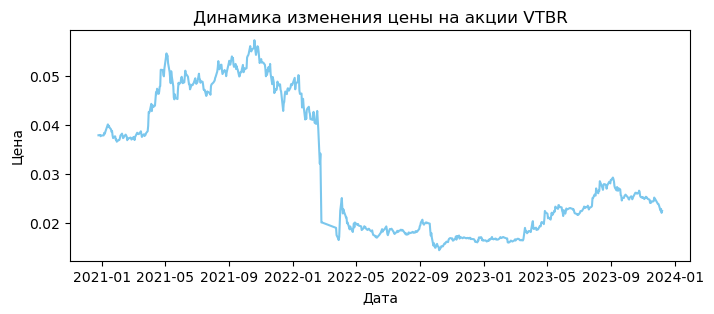

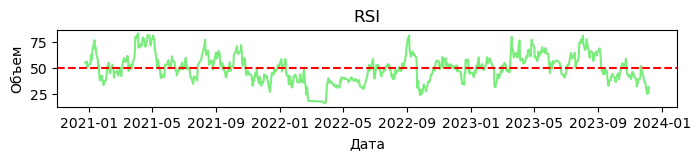

------------------------------------------------------------------------------------------------------------------


In [28]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new['RSI'] = rsi(df_new, 14).tolist()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(8, 3)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a)
    plt.figure(figsize=(8, 1))
    c = sns.lineplot(data=df_new, x='date',y='RSI',color = "#7BED7D")
    plt.axhline(y=50, color='r', linestyle='--')
    plt.title(f"RSI") 
    plt.xlabel("Дата")
    plt.ylabel("Объем")
    plt.show()
    print('------------------------------------------------------------------------------------------------------------------')

Рассмотрим суть RSI на примере акции АЛРОСА:

 1.Как следует из логики и формулы расчета, пересечение индикатором уровня 50 означает, что преобладающим становится усредненное движение либо вверх, либо вниз. Такое пересечение может свидетельствовать о начале тренда. Если индикатор пересекает уровень 50 снизу вверх и показывает устойчивое превышение этого уровня, то можно говорить о восходящем тренде.

Так, в начале 2022 годы мы видим, что график RSI показывает нисходящий тренд, собственно, цена на акцию уменьшается. Сигнал к продаже.

2.Другим сигналом к торговому действию может служить дивергенция, или расхождение между ценой актива и графиком RSI. Дивергенция наблюдается, когда цена инструмента достигает новых максимумов или минимумов, а значение RSI при этом меньше или больше относительно предыдущих рекордов соответственно. Например, когда цена бьет рекорды, а значение осциллятора ниже предыдущего максимума — это пример «медвежьей» дивергенции. Появление «медвежьей» дивергенции говорит о возможном развороте цены от роста к снижению.

«Бычья» дивергенция наблюдается тогда, когда цена актива достигает новых минимумов, а RSI при этом выше предыдущих своих минимумов. Это может быть сигналом с развороту котировок от снижения к росту.

Так, если посмотреть на графики, видно, что с сентября 2021 по март 2022 график RSI минимум конца периода ниже минимума начала периода, а на графике изменения цены в этом промежутке цена резко возрастает, а затем опять снижается, что является примером "медвежьей" дивергенции.

3.Многие инвесторы считают, что значения индикатора выше 70 означают перекупленность инструмента, а ниже 30 — его перепроданность. Иными словами, те, кто придерживаются такой точки зрения, считают, что если RSI больше 70, то инструмент слишком дорог и скоро должны начаться продажи. Также, если RSI ниже 30, то это значит, что актив чрезмерно дешевый и должны начаться покупки - об этом далее.


### 11. Функцию для вывода графиков: цены, скользящей средней (тип и период определите самостоятельно) и отдельный график для RSI индикатора. На вход функция принимает два параметра: тикер и год. 

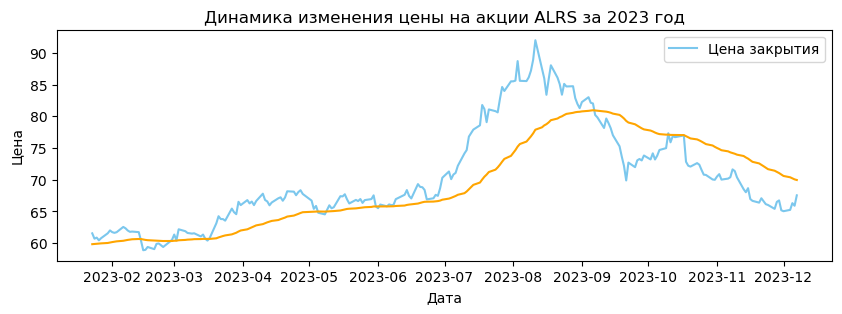

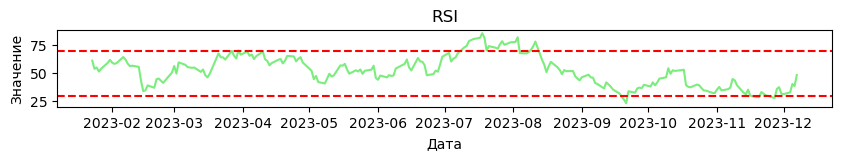

------------------------------------------------------------------------------------------------------------------


In [29]:
def newfunc(tiker_year):
    for i in range(len(tiker_year)):
        df_new_1 = pd.DataFrame({'close': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['close'].tolist(), 'date': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['date'].astype(str).tolist(),'volume': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['volume'].tolist()}) 
        df_new_1['date'] = pd.to_datetime(df_new_1['date'])
        df_new_1['moving_average_50'] = df_new_1['close'].ewm(span= 50 , adjust= False ).mean()
        df_new_1['RSI'] = rsi(df_new_1, 14).tolist()
        df_new_1 = df_new_1.dropna()
        plt.figure(figsize=(10,3))
        a = sns.lineplot(data=df_new_1, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
        b = sns.lineplot(data=df_new_1, x='date',y='moving_average_50',color = "orange")
        plt.title(f"Динамика изменения цены на акции {tiker_year[i][0]} за {tiker_year[i][1]} год") 
        plt.xlabel("Дата")
        plt.ylabel("Цена")
        plt.show()
        plt.figure(figsize=(10, 1))
        c = sns.lineplot(data=df_new_1, x='date',y='RSI',color = "#7BED7D")
        plt.axhline(y=30, color='r', linestyle='--')
        plt.axhline(y=70, color='r', linestyle='--')
        plt.title(f"RSI") 
        plt.xlabel("Дата")
        plt.ylabel("Значение")
        plt.show(c)
        print('------------------------------------------------------------------------------------------------------------------')
newfunc([('ALRS',2023)])

Изучим построенные графики.


50- ти дневная экспоненциальная скользящая средняя задает тренд изменения цены. На протяжении года наблюдается рост стоимости акции, однако, в сентябре 2023 года начинается спад. 
Так, на протяжении всего периода с 01 по 09 2023 года стоимость акции практически везде выше линии 50- ти дневной экспоненциальной скользящей средней, что говорит о том, что это благоприятное время для покупки акций. С 09.2023 наблюдается противоположное - акции стоит продавать. В середнине ноября 2023 года было самое благопритное время для этого.

RSI показывает, 
Если RSI больше 70, то инструмент слишком дорог и скоро должны начаться продажи. Также, если RSI ниже 30, то это значит, что актив чрезмерно дешевый и должны начаться покупки. Собственное, несмотря на то, что RSI показывается только силу тренда, и не всегда указывает на обязательное изменение цены, в данном случае, данное предположение подтверждается. По графикам видно, что в том промежутке, где RSI превышает 70, стоимость акций достигает пикового значения, а затем наблюдается падение цен.

Также на графике наблюдаются как "Бычья", так и "Медвежья" дивергенции. Например, с середины июля 2023 года по середину сентября 2023 году на графике стоимости акции набюдается как подъем, так и спад стоимости, достигается максимальное значение, а на графике  RSI нисходящий тренд. 




### ПРОГНОЗНАЯ МОДЕЛЬ

In [30]:
df[df['tiker'] == 'ALRS'].corr('kendall')

open      high       low     close    volume      diff      year
open    1.000000  0.961849  0.954090  0.937933  0.385249 -0.023815 -0.542375
high    0.961849  1.000000  0.947279  0.961110  0.399336  0.007510 -0.545353
low     0.954090  0.947279  1.000000  0.957394  0.370914  0.012280 -0.533041
close   0.937933  0.961110  0.957394  1.000000  0.386645  0.038523 -0.540800
volume  0.385249  0.399336  0.370914  0.386645  1.000000  0.008343 -0.195074
diff   -0.023815  0.007510  0.012280  0.038523  0.008343  1.000000 -0.020665
year   -0.542375 -0.545353 -0.533041 -0.540800 -0.195074 -0.020665  1.000000

In [31]:
dfa = pd.DataFrame(data=df[df['tiker'] == 'ALRS'], columns=['open', 'high', 'low', 'close', 'volume'])
#если делать прогноз на год dfa = pd.DataFrame(data=df[(df['tiker'] == 'ALRS')&(dfa['year']==2023)], columns=['open', 'high', 'low', 'close', 'volume'])



In [32]:
#процентное изменение цены закрытия по сравнению с предыдущим днем
dfa['price_change'] = dfa['close'].pct_change()

In [33]:
dfa.corr('kendall')

open      high       low     close    volume  price_change
open          1.000000  0.961849  0.954090  0.937933  0.385249     -0.015404
high          0.961849  1.000000  0.947279  0.961110  0.399336      0.013450
low           0.954090  0.947279  1.000000  0.957394  0.370914      0.019345
close         0.937933  0.961110  0.957394  1.000000  0.386645      0.043845
volume        0.385249  0.399336  0.370914  0.386645  1.000000     -0.000883
price_change -0.015404  0.013450  0.019345  0.043845 -0.000883      1.000000

In [34]:
#делим на тестовую и обучающую
train_size = int(len(dfa) * 0.8)
train_dfa, test_dfa = dfa[0:train_size], dfa[train_size:len(dfa)]

In [35]:
#выделяем зависимые и независимые переменные
x_train, y_train = train_dfa.drop(['close'], axis=1), train_dfa['close']
x_test, y_test = test_dfa.drop(['close'], axis=1), test_dfa['close']

In [36]:
x_train.iloc[0,4]=0
x_train

open   high    low      volume  price_change
1    91.45  93.50  90.91  25422340.0      0.000000
2    92.02  94.49  91.44  23330050.0      0.011095
3    93.17  93.90  91.41  13760650.0     -0.013986
4    91.74  93.33  90.69  23786910.0      0.006110
5    92.26  93.29  91.91   9988550.0     -0.001193
..     ...    ...    ...         ...           ...
592  65.51  66.11  65.05   6591730.0      0.007034
593  65.90  66.40  64.67   7567360.0     -0.016247
594  64.74  65.06  64.10   3377600.0     -0.004013
595  65.65  66.50  64.56  20275110.0      0.022160
596  66.12  66.97  64.58  14519960.0     -0.007126

[596 rows x 5 columns]

In [37]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_train_st

array([[-0.10421687, -0.08003908, -0.06417458,  0.48107813,  0.01027611],
       [-0.08409607, -0.04561133, -0.04520589,  0.34257287,  0.45903371],
       [-0.04350148, -0.06612888, -0.04627959, -0.29090159, -0.55539352],
       ...,
       [-1.04707033, -1.06905425, -1.02370433, -0.97823798, -0.15202978],
       [-1.01494766, -1.01897754, -1.00724093,  0.14034217,  0.90655523],
       [-0.99835683, -1.00263305, -1.00652513, -0.24063684, -0.27791867]])

In [38]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

In [39]:
model = Ridge()
model.fit(x_train_st, y_train)
print(model.coef_, model.intercept_)
predictions = model.predict(x_test_st)
# проверяем r2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions) 
r2

[ 9.66318502 10.21987081  8.35604879  0.19316429  1.25405136] 94.33882550335572


0.9946791820373885

C:\Users\Админ\AppData\Local\Temp\ipykernel_15056\567676375.py:38: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



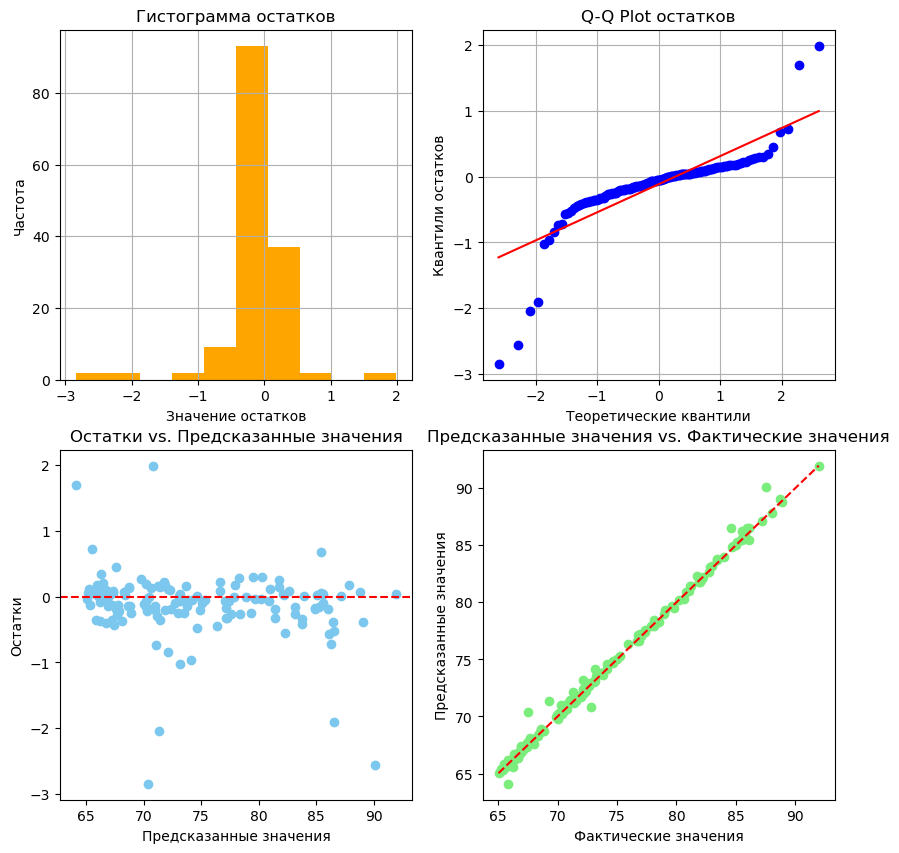

In [40]:
import statsmodels.api as sm
# Получение остатков модели
residuals = y_test - predictions

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals, color="orange")
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(predictions, residuals,color="#7BC7ED")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y_test, predictions,color="#7BED7D")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')
plt.show()

In [41]:
#тоже самое уже для всего периода, то есть нашла прогнозные значения, подставив в уравнение регресиии, и сравнила их с фактическими
x=dfa.drop(['close'], axis=1)
x.iloc[0,4]=0
x_t= scaler.fit_transform(x)
predict = model.predict(x_t)
predict =[round(v,1) for v in predict]

In [42]:
df_for_analicit = pd.DataFrame({'close': dfa['close'].tolist(), 'predictions': predict})
df_for_analicit['remain'] = df_for_analicit['close'] - df_for_analicit['predictions']

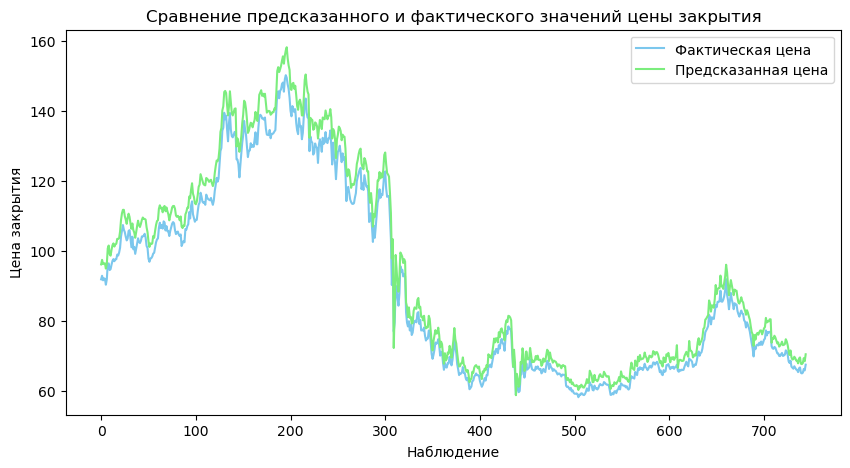

In [43]:
plt.figure(figsize=(10, 5)) 
plt.plot(df_for_analicit['close'], color="#7BC7ED")
plt.plot(df_for_analicit['predictions'], color="#7BED7D")
plt.xlabel('Наблюдение')
plt.ylabel('Цена закрытия')
plt.title('Сравнение предсказанного и фактического значений цены закрытия')
plt.legend(('Фактическая цена', 'Предсказанная цена'))
plt.show()

In [44]:
y_test = df_for_analicit['close']
predictions = df_for_analicit['predictions']

C:\Users\Админ\AppData\Local\Temp\ipykernel_15056\567676375.py:38: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



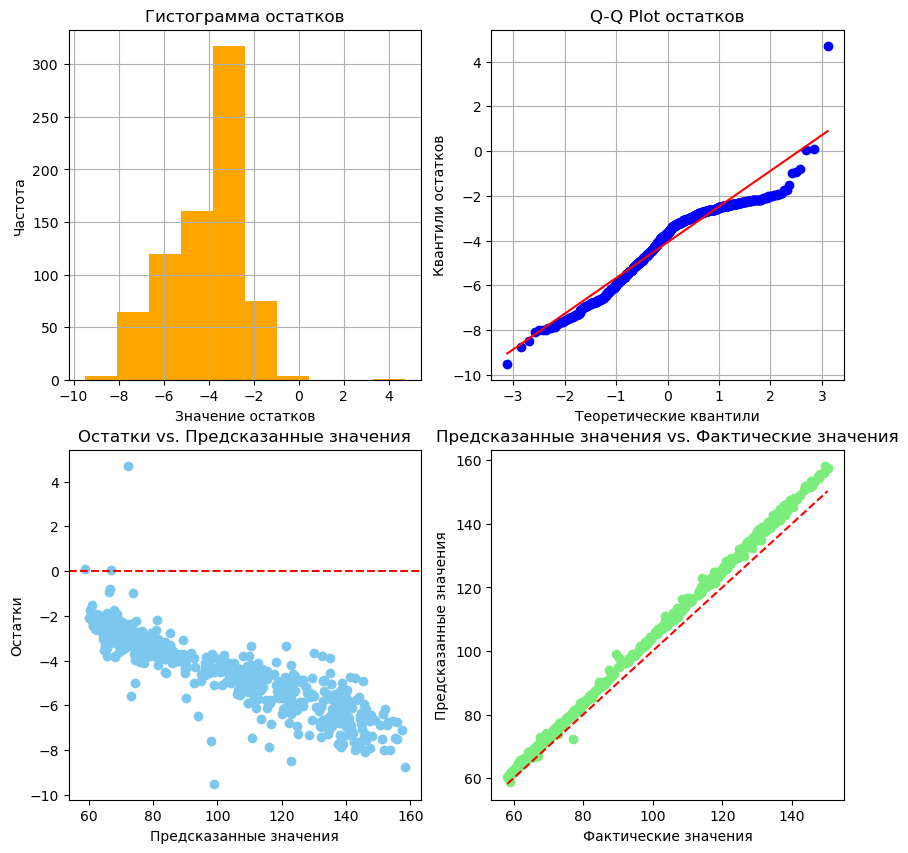

In [45]:
import statsmodels.api as sm
# Получение остатков модели
residuals = y_test - predictions

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals, color="orange")
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(predictions, residuals,color="#7BC7ED")
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y_test, predictions,color="#7BED7D")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')
plt.show()

Как видно, прогнозирование подобным способом приводит к возникновению больших (по величине) остатков.
Это видно по графику, так же тест Парка это подтверждает. Он внизу.

Также стоит отметить, что прогнозная цена часто выше фактической.

Если смотреть прогноз отдельно по каждому году, ситуация как-будто лучше.

Есть еще библиотека NeuralProphet – это библиотека Python с открытым исходным кодом, созданная Facebook для моделирования временных рядов. У меня возникли проблемы после ее загрузки, поэтому я решила больше не рисковать.

In [54]:
dfa['remain'] = df_for_analicit['remain'].tolist()
dfa

open   high    low  close      volume  price_change  remain
1    91.45  93.50  90.91  91.93  25422340.0           NaN   -4.27
2    92.02  94.49  91.44  92.95  23330050.0      0.011095   -4.55
3    93.17  93.90  91.41  91.65  13760650.0     -0.013986   -4.65
4    91.74  93.33  90.69  92.21  23786910.0      0.006110   -4.29
5    92.26  93.29  91.91  92.10   9988550.0     -0.001193   -4.40
..     ...    ...    ...    ...         ...           ...     ...
741  65.10  65.84  64.65  65.03   7642120.0     -0.002301   -2.67
742  64.97  66.14  64.41  65.24  10087500.0      0.003229   -2.76
743  65.50  66.95  65.20  66.30   7458000.0      0.016248   -3.10
744  66.51  66.54  64.70  65.89  22874660.0     -0.006184   -2.61
745  65.75  67.70  65.40  67.53  22157960.0      0.024890   -2.97

[745 rows x 7 columns]

In [55]:
dfa['remain'] = np.log(dfa['remain'] ** 2)
dfa['open'] = np.log(dfa['open'])
dfa['high'] = np.log(dfa['high'])
dfa['low'] = np.log(dfa['low'])
dfa['volume'] = np.log(dfa['volume'])
dfa

open      high       low  close     volume  price_change    remain
1    4.515792  4.537961  4.509870  91.93  17.051139           NaN  2.903228
2    4.522006  4.548494  4.515683  92.95  16.965253      0.011095  3.030254
3    4.534426  4.542230  4.515355  91.65  16.437324     -0.013986  3.073734
4    4.518958  4.536142  4.507447  92.21  16.984646      0.006110  2.912573
5    4.524611  4.535713  4.520810  92.10  16.116950     -0.001193  2.963209
..        ...       ...       ...    ...        ...           ...       ...
741  4.175925  4.187228  4.168988  65.03  15.849186     -0.002301  1.964157
742  4.173926  4.191774  4.165269  65.24  16.126808      0.003229  2.030461
743  4.182050  4.203946  4.177459  66.30  15.824798      0.016248  2.262804
744  4.197352  4.197803  4.169761  65.89  16.945540     -0.006184  1.918700
745  4.185860  4.215086  4.180522  67.53  16.913707      0.024890  2.177124

[745 rows x 7 columns]

In [56]:
from statsmodels.formula.api import ols
model = ols(formula="remain ~ low", data=dfa).fit() 
print(model.summary())#выдача информации


                            OLS Regression Results                            
Dep. Variable:                 remain   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1596.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          3.18e-187
Time:                        21:50:32   Log-Likelihood:                -538.47
No. Observations:                 745   AIC:                             1081.
Df Residuals:                     743   BIC:                             1090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6723      0.284    -30.533      0.0

Fнабл > Fтабл => гипотеза о незначимости непринимается, значит, гетероскедастичность, то есть непостоянство дисперсии.

Итоги работы:
По ходу работы были сделаны выводы по всем разделам, поэтому не вижу смысла еще раз все прописывать. В целом, был проведен технический анализ стоимости акций, который не позволяет учесть все факторы, которые могут повлиять на финансовые результаты и биржевую цену.

Путем изучения линейных графиков (а также отдельно построенного графика свечей) можно выявить направления движения стоимости отдельных акций, определить линии поддержки и соспротивления. Также на графиках можно увиеть типичные фигуры, сигнализирующие о предстоящем изменении цен.

Скользящие средние помогают выявить основной тренд стоимости акций, а также делать выводы об изменении на рынке.

RSI помогает выявить сигналы для покупки и продажи акций.

Таким образом, технический анализ, несмотря на возможные ложные и запаздывающие сигналы, помогает инвесторам изучить ситуацию на бирже, а также помогает принять решения о вступлении в торги.

